In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv("data.csv")
data

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.21,0.14,0.62,1.06,278,9.8,165,0.18,8.6,0.57,5.8,88.2,2.4,9.4,4.23,8.81,Fertile
96,7.50,0.22,0.68,1.17,272,9.5,139,0.72,2.6,0.12,1.8,95.4,1.4,3.2,0.00,5.58,Non Fertile
97,8.26,0.25,0.71,1.22,277,11.5,264,0.36,7.6,0.07,0.8,90.7,2.5,6.8,3.85,7.26,Fertile
98,8.12,0.14,0.73,1.25,265,4.6,283,0.38,3.7,0.18,0.8,86.0,6.7,7.3,0.00,3.10,Non Fertile


# Data Pre-Processing

In [4]:
data.drop(['EC','P', 'K', 'Zn', 'Fe', 'Cu', 'Mn', 'CaCO3','OM'], inplace = True, axis = 1)
data

,pH,OC,N,Sand,Silt,Clay,CEC,Output
0,7.74,0.01,75,84.3,6.8,8.9,7.81,Fertile
1,9.02,0.02,85,90.4,3.9,5.7,7.19,Fertile
2,7.80,0.02,77,84.5,6.9,8.6,12.32,Fertile
3,8.36,0.03,106,93.9,1.7,4.4,1.60,Non Fertile
4,8.36,0.03,96,91.5,4.1,4.4,7.21,Non Fertile
...,...,...,...,...,...,...,...,...
95,9.21,0.62,278,88.2,2.4,9.4,8.81,Fertile
96,7.50,0.68,272,95.4,1.4,3.2,5.58,Non Fertile
97,8.26,0.71,277,90.7,2.5,6.8,7.26,Fertile
98,8.12,0.73,265,86.0,6.7,7.3,3.10,Non Fertile


### 0 -> Fertile
### 1 -> Not Fertile

In [5]:
def encode(res):
    if res == "Non Fertile":
        return 1
    else:
        return 0

data.Output = data.Output.map(encode)
data.Output

0     0
1     0
2     0
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: Output, Length: 100, dtype: int64

<AxesSubplot:>

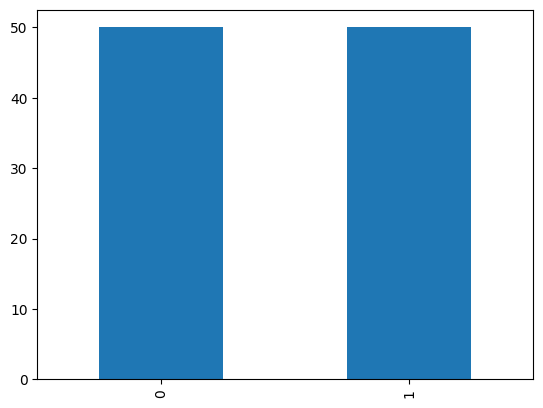

In [6]:
data['Output'].value_counts().plot(kind = "bar")

In [7]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

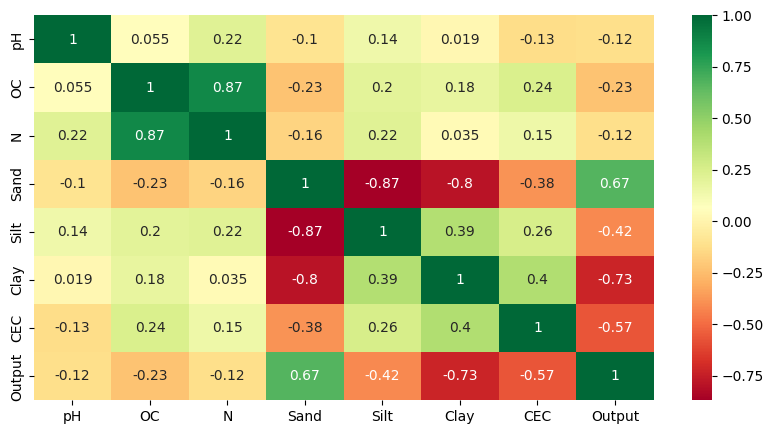

In [8]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 5))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
# from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

  Specs      Score
5  Clay  59.067537
6   CEC  52.304725
4  Silt  35.694148
2     N  30.341283
3  Sand  13.702893
1    OC   0.787213
0    pH   0.047442


In [31]:
print(x_train.shape)
print(y_train.shape)

(60, 7)
(60,)


In [32]:
print(x_test.shape)
print(y_test.shape)

(40, 7)
(40,)


# Feature Scaling

In [10]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[ 1.32433159e+00 -9.94768891e-01 -1.42661730e+00  5.22862438e-01
  -5.17066459e-01 -3.60267137e-01  8.50377732e-01]
 [ 8.92697587e-01 -6.48972889e-02  4.84030869e-01  5.41208488e-01
  -7.89445629e-01 -1.95591616e-02  2.74417284e-01]
 [ 1.81482477e+00 -4.71716115e-01 -5.12829045e-01 -9.44821598e-01
   4.90736472e-01  1.26755986e+00 -5.39359090e-01]
 [-1.81482477e+00 -4.71716115e-01 -2.96842730e-01  1.03655185e+00
  -5.71542293e-01 -1.34453462e+00  1.85236312e-01]
 [ 2.94295908e-02 -9.36651915e-01 -1.24385965e+00  7.24668993e-01
  -4.62590625e-01 -8.52400879e-01  8.57809480e-01]
 [ 4.90493180e-02 -7.62300990e-01 -8.45115683e-01 -1.19249328e-01
   3.54546887e-01 -2.46697812e-01  2.59553789e-01]
 [ 6.37641134e-01 -7.04184015e-01 -6.12515036e-01  1.92633530e-01
  -4.35352708e-01  2.07579489e-01 -7.73459143e-01]
 [ 1.07908500e-01 -4.71716115e-01 -2.63614066e-01  1.45851101e+00
  -1.08906272e+00 -1.49596039e+00 -4.61325739e-01]
 [-6.18021407e-01 -4.71716115e-01 -3.79914389e-01 -4.31132186e-0

# Random Forest

In [11]:
accuracy = {}

In [18]:
print('----- RANDOM FOREST -----')
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)
testlabel = rf.predict(x_test)
res = pd.DataFrame(list(zip(y_test, testlabel)), columns=["Actual Values", "Predictions"])

----- RANDOM FOREST -----


In [19]:
rf_acc= rf.score(x_test,y_test)
print("Accuracy: ",rf_acc*100,"%")
accuracy['Random Forest'] = rf_acc

Accuracy:  90.0 %


In [20]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19  2]
 [ 2 17]]


0.9

# Kernel SVM

In [21]:
svc_model = SVC(kernel = 'rbf', random_state = 0)
svc_model.fit(x_train, y_train)

SVC(random_state=0)

In [22]:
y_pred = svc_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
svm_acc = accuracy_score(y_test, y_pred)
accuracy['SVM'] = svm_acc
print(svm_acc)

[[20  1]
 [ 2 17]]
0.925


In [157]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svc_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 93.33 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


# K-Nearest Neighbors

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1, leaf_size = 1)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

In [24]:
y_pred = knn_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
knn_acc = accuracy_score(y_test, y_pred)
accuracy["KNN"] = knn_acc
print(knn_acc)

[[20  1]
 [ 0 19]]
0.975


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [195]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


# Decision Tree

In [26]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
y_pred = dt_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt_acc = accuracy_score(y_test, y_pred)
accuracy["Decision Tree"] = dt_acc
print(dt_acc)

[[18  3]
 [ 2 17]]
0.875


# Logistic Regression

In [28]:
lr_classifier = LogisticRegression(penalty='l2', random_state = 0)
lr_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred = lr_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
lr_acc = accuracy_score(y_test, y_pred)
accuracy["Logistic Regression"] = lr_acc
print(lr_acc)

[[20  1]
 [ 2 17]]
0.925


# Naive Bayes

In [30]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [31]:
y_pred = nb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
nb_acc = accuracy_score(y_test, y_pred)
accuracy["Naive Bayes"] = nb_acc
print(nb_acc)

[[19  2]
 [ 2 17]]
0.9


# XGBoost

In [32]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [33]:
y_pred = xgb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
xgb_acc = accuracy_score(y_test, y_pred)
accuracy["XGB"] = xgb_acc
print(xgb_acc)

[[17  4]
 [ 2 17]]
0.85


# Evaluation

In [34]:

all_accuracy = pd.DataFrame(list(accuracy.items()), columns = ['Models', 'Accuracy'])
all_accuracy

,Models,Accuracy
0,Random Forest,0.900
1,SVM,0.925
2,KNN,0.975
3,Decision Tree,0.875
4,Logistic Regression,0.925
5,Naive Bayes,0.900
6,XGB,0.850


<AxesSubplot:>

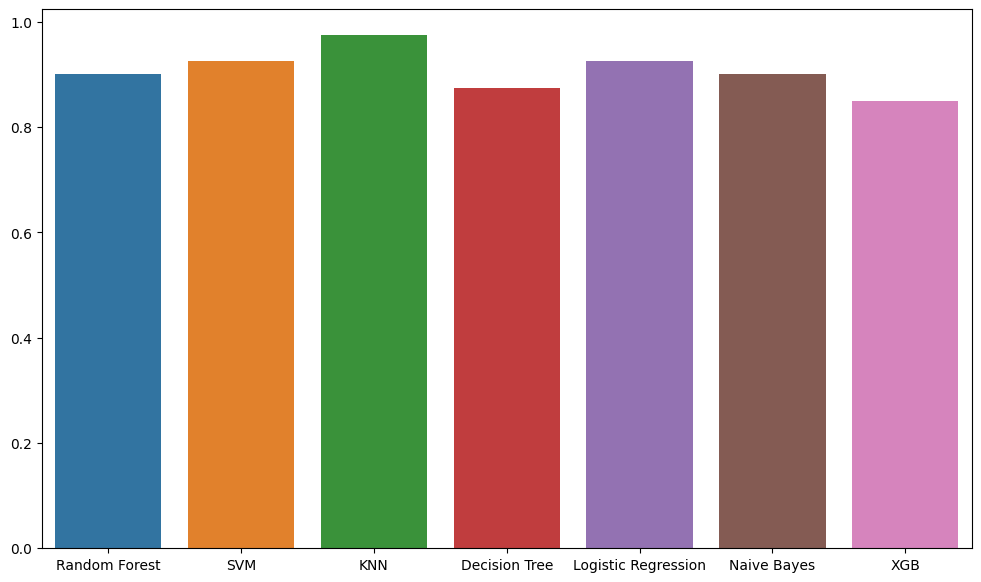

In [50]:
plt.figure(figsize=(12, 7))
sns.barplot(x = list(all_accuracy.Models), y = list(all_accuracy.Accuracy))

In [146]:
y_score1 = knn_classifier.predict_proba(x_test)[:,1]
# y_score2 = clf_reg.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = metrics.roc_curve(y_test, y_score1)

In [147]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.9874686716791979


# Saving Model

In [210]:
import joblib
joblib.dump(knn_classifier, 'model.pkl')

['model.pkl']